# Day 0: Installation test

The goal of this exercise is to make sure that you can run it from your computer before we start class.

The exercise will have you replicate a simple plot about wind installed capacity from the [Our World in Data](https://ourworldindata.org/renewable-energy).

Make sure you have the [data file](cumulative-installed-wind-energy-capacity-gigawatts.csv) donwloaded in the same folder as this file.


We need to load packages in Julia, similar to the import function in Python or the library functionality in R. *Pluto* will install the libraries automatically, but generally they need to be installed as follows:

```
using Pkg
Pkg.add("LibraryName")
```


In [1]:
begin
  
    # installing libraries
    using Pkg
    #Pkg.add(["DataFrames","CSV","Plots"])

    # libraries that we will use
    using DataFrames
	using CSV
    using Plots
	
end

We load the data using the DataFrames and CSV syntax in Julia.

In [2]:
begin
	df = CSV.read("cumulative-installed-wind-energy-capacity-gigawatts.csv", DataFrame)
	first(df, 5)
	rename!(df,"Wind Capacity"=>"WindCapacity")
end

,Entity,Code,Year,WindCapacity
,String31,String15?,Int64,Float64
1,Africa,missing,1997,0.006
2,Africa,missing,1998,0.01
3,Africa,missing,1999,0.064
4,Africa,missing,2000,0.1334
5,Africa,missing,2001,0.1334
6,Africa,missing,2002,0.13966
7,Africa,missing,2003,0.15024
8,Africa,missing,2004,0.22616
9,Africa,missing,2005,0.22638


We will be plotting the evolution of wind investment over time for a few select countries.

1. We first filter the data with the list of countries.

2. We then plot the evolution of installed capacities for each country. 

In [3]:
begin
	# we clean up the data and select relevant entries
	country_list = ["Germany", "Spain", "United States"];
	df_sample = df[df.Year .> 2000, :];
	filter!(row -> row.Entity in country_list, df_sample);
	select!(df_sample, ["Entity", "Year", "WindCapacity"]);
end

,Entity,Year,WindCapacity
,String31,Int64,Float64
1,Germany,2001,8.754
2,Germany,2002,12.001
3,Germany,2003,14.381
4,Germany,2004,16.419
5,Germany,2005,18.248
6,Germany,2006,20.474
7,Germany,2007,22.116
8,Germany,2008,22.794
9,Germany,2009,25.732


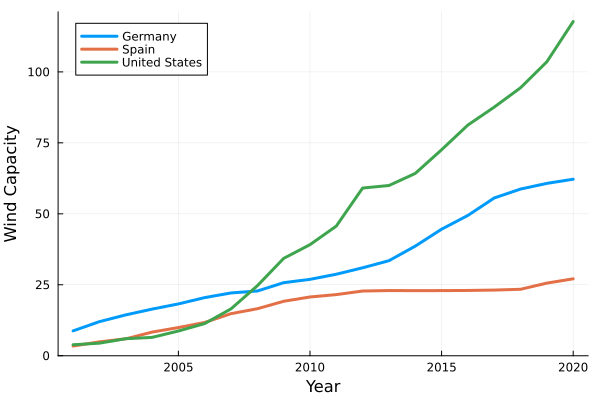

In [4]:
begin

	# we create a plot
	plot(df_sample.Year, df_sample.WindCapacity, group = df_sample.Entity, 
			seriestype = :line, linewidth = 3,
			xlabel = "Year",
			ylabel = "Wind Capacity";
	);

end